# VitoshAcademy – Talking about Linear Regression again

1) Linear Regression finds coefficients that minimize the sum of squared errors between y and predictions.
2) Straight line: `ŷ = b + m·x` where `m` is slope and `b` is intercept.
3) With features `[x, x²]` the same method fits a parabola: `ŷ = c + b·x + a·x²` (still linear in coefficients).
4) Always plot the data, print the learned formulas, and compare models at your real x values.


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [18]:
np.set_printoptions(precision=6, suppress=True)

In [21]:
def true_fn(x):
    x = np.asarray(x, dtype = float)
    return (x * (x-1)) / 2

In [63]:
X = np.array([1,2,3,4,5,6,7,8,9,10,12,15,11,13,20,30,40,50]).reshape(-1,1)
y = true_fn(X.ravel())
Xs = np.sort(X, axis = 0)
y_true_on_Xs = true_fn(Xs.ravel())

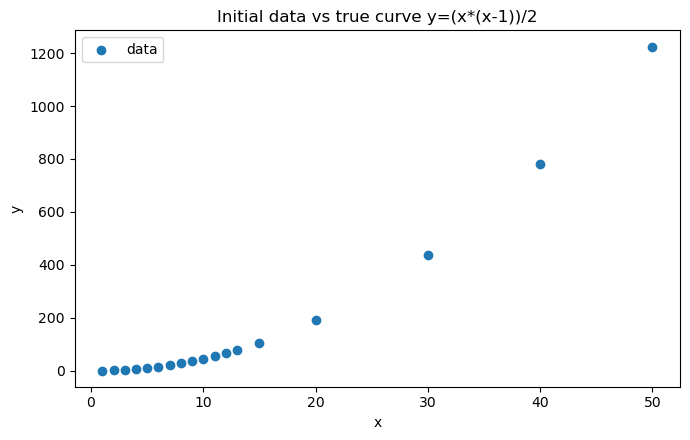

In [64]:
plt.figure(figsize = (7, 4.5))
plt.scatter(X, y, label = "data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Initial data vs true curve y=(x*(x-1))/2")
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
lin = LinearRegression().fit(X, y)

In [65]:
m = float(lin.coef_[0])
b = float(lin.intercept_)
y_line_on_Xs = lin.predict(Xs)

In [66]:
print(f" Linear fit formula: y={m:.2f}*x + {b:.2f}")

 Linear fit formula: y=18.89*x + -100.58


In [67]:
y_line_on_Xs

array([-81.683462, -62.790137, -43.896813, -25.003488,  -6.110164,
        12.78316 ,  31.676485,  50.569809,  69.463133,  88.356458,
       107.249782, 126.143106, 145.036431, 182.823079, 277.289701,
       466.222945, 655.156188, 844.089432])

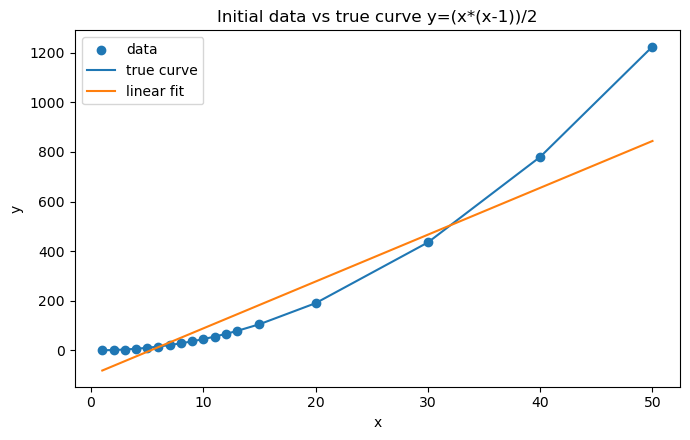

In [68]:
plt.figure(figsize = (7, 4.5))
plt.scatter(X, y, label = "data")
plt.plot(Xs, y_true_on_Xs, label = "true curve")
plt.plot(Xs, y_line_on_Xs, label = "linear fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Initial data vs true curve y=(x*(x-1))/2")
plt.legend()
plt.tight_layout()
plt.show()

In [69]:
poly2 = Pipeline([
    ("poly", PolynomialFeatures(degree = 2, include_bias = False)),
    ("lr", LinearRegression())
]).fit(X,y)

In [70]:
coef = poly2.named_steps["lr"].coef_

In [71]:
c = float(poly2.named_steps["lr"].intercept_)
b2 = float(coef[0])
a = float(coef[1])
print(f"Quadratic fit formula: y ≈ {a:.6f}·x^2 + {b2:.6f}·x + {c:.6f}")
y_quad_on_Xs = poly2.predict(Xs)

Quadratic fit formula: y ≈ 0.500000·x^2 + -0.500000·x + -0.000000


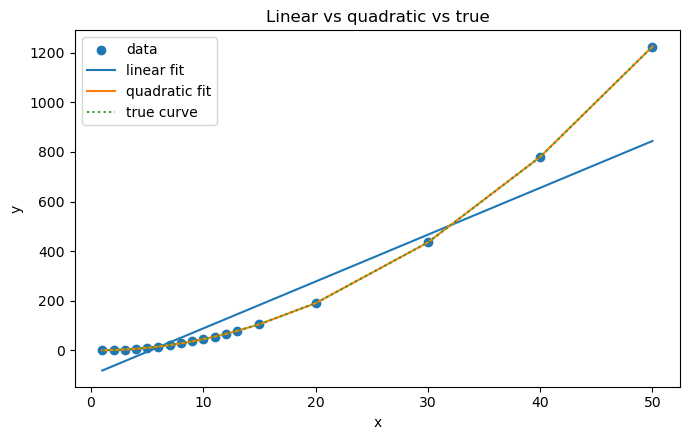

In [72]:
plt.figure(figsize=(7, 4.5))
plt.scatter(X, y, label="data")
plt.plot(Xs, y_line_on_Xs, label="linear fit")
plt.plot(Xs, y_quad_on_Xs, label="quadratic fit")
plt.plot(Xs, y_true_on_Xs, label="true curve", linestyle=":")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear vs quadratic vs true")
plt.legend()
plt.tight_layout()
plt.show()